In [11]:
# All required imports

import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from langchain_huggingface import HuggingFaceEmbeddings
from sklearn.metrics.pairwise import cosine_similarity

In [4]:
# Create Pandas dataframe

data = [
    {
        "name": "Boho Dress",
        "desc": "Flowy, earthy-toned dress perfect for festivals and outdoor vibes.",
        "tags": ["boho", "festival", "earthy", "relaxed"]
    },
    {
        "name": "Urban Street Jacket",
        "desc": "Sleek black leather jacket with bold zippers for an edgy street look.",
        "tags": ["urban", "edgy", "chic", "streetwear"]
    },
    {
        "name": "Cozy Knit Sweater",
        "desc": "Soft oversized sweater made of warm wool for chilly evenings.",
        "tags": ["cozy", "casual", "warm", "comfy"]
    },
    {
        "name": "Elegant Evening Gown",
        "desc": "Long satin gown with shimmer details for glamorous night parties.",
        "tags": ["elegant", "glamorous", "formal", "luxury"]
    },
    {
        "name": "Sporty Tracksuit",
        "desc": "Lightweight, breathable tracksuit for energetic workouts and active lifestyles.",
        "tags": ["sporty", "energetic", "casual", "modern"]
    },
    {
        "name": "Minimalist White Shirt",
        "desc": "Crisp white cotton shirt that defines a clean and modern professional look.",
        "tags": ["minimal", "formal", "professional", "chic"]
    },
    {
        "name": "Vintage Denim Jeans",
        "desc": "Classic high-waisted denim jeans with a faded texture for a retro vibe.",
        "tags": ["vintage", "retro", "casual", "timeless"]
    },
    {
        "name": "Summer Floral Skirt",
        "desc": "Bright floral skirt that brings sunny, cheerful vibes and light comfort.",
        "tags": ["floral", "summer", "cheerful", "bright"]
    },
    {
        "name": "Athleisure Hoodie",
        "desc": "Comfortable zip-up hoodie designed for both workouts and everyday errands.",
        "tags": ["sporty", "casual", "comfortable", "modern"]
    },
    {
        "name": "Formal Blazer",
        "desc": "Tailored navy-blue blazer that enhances a confident and polished look.",
        "tags": ["formal", "professional", "chic", "modern"]
    },
    {
        "name": "Casual Cargo Pants",
        "desc": "Relaxed-fit cargo pants with multiple pockets for a rugged, streetwear feel.",
        "tags": ["urban", "casual", "rugged", "streetwear"]
    },
    {
        "name": "Beach Sandals",
        "desc": "Light, durable sandals ideal for beach vacations and tropical weather.",
        "tags": ["beach", "casual", "summer", "relaxed"]
    },
    {
        "name": "Classic Trench Coat",
        "desc": "Elegant beige trench coat perfect for rainy days and timeless style.",
        "tags": ["elegant", "classic", "formal", "timeless"]
    },
    {
        "name": "Party Sequin Top",
        "desc": "Shiny silver sequin top that adds sparkle and glamour to night outings.",
        "tags": ["party", "glamorous", "bold", "nightwear"]
    },
    {
        "name": "Yoga Leggings",
        "desc": "Stretchy, breathable leggings built for flexibility and active movement.",
        "tags": ["sporty", "energetic", "comfortable", "modern"]
    },
    {
        "name": "Rustic Wool Scarf",
        "desc": "Handwoven wool scarf offering warmth and an earthy countryside feel.",
        "tags": ["rustic", "cozy", "warm", "earthy"]
    },
    {
        "name": "Luxury Handbag",
        "desc": "Premium leather handbag with gold accents for a sophisticated appeal.",
        "tags": ["luxury", "elegant", "chic", "formal"]
    },
    {
        "name": "Denim Jacket",
        "desc": "Faded blue denim jacket that pairs perfectly with casual or street outfits.",
        "tags": ["casual", "streetwear", "vintage", "urban"]
    },
    {
        "name": "Silk Pajama Set",
        "desc": "Soft silk pajama set that feels luxurious yet relaxed for bedtime comfort.",
        "tags": ["cozy", "luxury", "nightwear", "relaxed"]
    },
    {
        "name": "Retro Graphic Tee",
        "desc": "Cotton T-shirt with colorful 90s-inspired prints for a nostalgic vibe.",
        "tags": ["retro", "vintage", "casual", "fun"]
    }
]

df = pd.DataFrame(data)
df.head(10)


,name,desc,tags
0,Boho Dress,"Flowy, earthy-toned dress perfect for festival...","[boho, festival, earthy, relaxed]"
1,Urban Street Jacket,Sleek black leather jacket with bold zippers f...,"[urban, edgy, chic, streetwear]"
2,Cozy Knit Sweater,Soft oversized sweater made of warm wool for c...,"[cozy, casual, warm, comfy]"
3,Elegant Evening Gown,Long satin gown with shimmer details for glamo...,"[elegant, glamorous, formal, luxury]"
4,Sporty Tracksuit,"Lightweight, breathable tracksuit for energeti...","[sporty, energetic, casual, modern]"
5,Minimalist White Shirt,Crisp white cotton shirt that defines a clean ...,"[minimal, formal, professional, chic]"
6,Vintage Denim Jeans,Classic high-waisted denim jeans with a faded ...,"[vintage, retro, casual, timeless]"
7,Summer Floral Skirt,"Bright floral skirt that brings sunny, cheerfu...","[floral, summer, cheerful, bright]"
8,Athleisure Hoodie,Comfortable zip-up hoodie designed for both wo...,"[sporty, casual, comfortable, modern]"
9,Formal Blazer,Tailored navy-blue blazer that enhances a conf...,"[formal, professional, chic, modern]"


In [5]:
# Add one more column in dataframe which contain product_name, product_desc and also product_tags 
# We give 'text' name to that column

df['text'] = df.apply(lambda row: row['name'] + " " + row['desc'] + " " + " ".join(row['tags']), axis=1)

df

,name,desc,tags,text
0,Boho Dress,"Flowy, earthy-toned dress perfect for festival...","[boho, festival, earthy, relaxed]","Boho Dress Flowy, earthy-toned dress perfect f..."
1,Urban Street Jacket,Sleek black leather jacket with bold zippers f...,"[urban, edgy, chic, streetwear]",Urban Street Jacket Sleek black leather jacket...
2,Cozy Knit Sweater,Soft oversized sweater made of warm wool for c...,"[cozy, casual, warm, comfy]",Cozy Knit Sweater Soft oversized sweater made ...
3,Elegant Evening Gown,Long satin gown with shimmer details for glamo...,"[elegant, glamorous, formal, luxury]",Elegant Evening Gown Long satin gown with shim...
4,Sporty Tracksuit,"Lightweight, breathable tracksuit for energeti...","[sporty, energetic, casual, modern]","Sporty Tracksuit Lightweight, breathable track..."
5,Minimalist White Shirt,Crisp white cotton shirt that defines a clean ...,"[minimal, formal, professional, chic]",Minimalist White Shirt Crisp white cotton shir...
6,Vintage Denim Jeans,Classic high-waisted denim jeans with a faded ...,"[vintage, retro, casual, timeless]",Vintage Denim Jeans Classic high-waisted denim...
7,Summer Floral Skirt,"Bright floral skirt that brings sunny, cheerfu...","[floral, summer, cheerful, bright]",Summer Floral Skirt Bright floral skirt that b...
8,Athleisure Hoodie,Comfortable zip-up hoodie designed for both wo...,"[sporty, casual, comfortable, modern]",Athleisure Hoodie Comfortable zip-up hoodie de...
9,Formal Blazer,Tailored navy-blue blazer that enhances a conf...,"[formal, professional, chic, modern]",Formal Blazer Tailored navy-blue blazer that e...


In [6]:
# Initialize embedding model
embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

# Function of embedding text
def embed_text(text):
    return embedding_model.embed_query(text)

In [7]:
# Add text embedding in dataframe as a new column

df['text_embedding'] = df.apply(lambda row: embed_text(row['text']), axis=1)
df

,name,desc,tags,text,text_embedding
0,Boho Dress,"Flowy, earthy-toned dress perfect for festival...","[boho, festival, earthy, relaxed]","Boho Dress Flowy, earthy-toned dress perfect f...","[-0.027225583791732788, 0.009272952564060688, ..."
1,Urban Street Jacket,Sleek black leather jacket with bold zippers f...,"[urban, edgy, chic, streetwear]",Urban Street Jacket Sleek black leather jacket...,"[-0.057102978229522705, 0.09670481830835342, 0..."
2,Cozy Knit Sweater,Soft oversized sweater made of warm wool for c...,"[cozy, casual, warm, comfy]",Cozy Knit Sweater Soft oversized sweater made ...,"[-0.03497958555817604, 0.05870566517114639, 0...."
3,Elegant Evening Gown,Long satin gown with shimmer details for glamo...,"[elegant, glamorous, formal, luxury]",Elegant Evening Gown Long satin gown with shim...,"[0.00686065386980772, 0.045948270708322525, 0...."
4,Sporty Tracksuit,"Lightweight, breathable tracksuit for energeti...","[sporty, energetic, casual, modern]","Sporty Tracksuit Lightweight, breathable track...","[-0.01697910763323307, 0.07011190056800842, 0...."
5,Minimalist White Shirt,Crisp white cotton shirt that defines a clean ...,"[minimal, formal, professional, chic]",Minimalist White Shirt Crisp white cotton shir...,"[0.039564985781908035, 0.07693547010421753, 0...."
6,Vintage Denim Jeans,Classic high-waisted denim jeans with a faded ...,"[vintage, retro, casual, timeless]",Vintage Denim Jeans Classic high-waisted denim...,"[-0.038330014795064926, 0.08308872580528259, 0..."
7,Summer Floral Skirt,"Bright floral skirt that brings sunny, cheerfu...","[floral, summer, cheerful, bright]",Summer Floral Skirt Bright floral skirt that b...,"[0.017940625548362732, 0.03758856654167175, 0...."
8,Athleisure Hoodie,Comfortable zip-up hoodie designed for both wo...,"[sporty, casual, comfortable, modern]",Athleisure Hoodie Comfortable zip-up hoodie de...,"[-0.09997888654470444, 0.10409175604581833, -0..."
9,Formal Blazer,Tailored navy-blue blazer that enhances a conf...,"[formal, professional, chic, modern]",Formal Blazer Tailored navy-blue blazer that e...,"[-0.06942082941532135, 0.05622466281056404, 0...."


In [8]:
# Function which will find top 3 similarity between query and dataframe entries 

def find_top_3_similarity(df, query):
    embed_query = embed_text(query)
    similarity = cosine_similarity([embed_query], np.vstack(df['text_embedding'].values))
    return sorted(similarity[0], reverse=True)[:3], similarity[0].argsort()[17:]

In [ ]:
query = "Looking for a comfortable and stylish outfit for casual outings."

start_time = time.time()
similarity, indexes = find_top_3_similarity(df, query)
end_time = time.time()
print(f"Latency: {end_time - start_time} seconds \n")

threshold = 0.8

if similarity[0] < threshold:
    print("No strong vibe match found. Try a different vibe. \n")
else:
    print("Strong vibe matches found!. \n")
    
    k = 0
    for i in indexes:
        print(f"{df.iloc[i]['name']} -> score: {similarity[k]}")
        k += 1



Latency: 0.09279680252075195 seconds 

No strong vibe match found. Try a different vibe. 



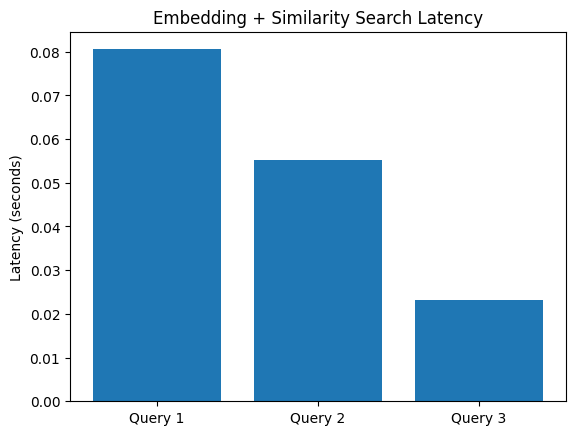

In [14]:
queries = [
    "Looking for an energetic and modern workout outfit.",
    "Want something elegant and formal for an office event.",
    "Need a cozy and comfortable winter outfit."
]

latencies = []
query_wise_good_matches = []
for query in queries:
    start_time = time.time()
    similarity, indexes = find_top_3_similarity(df, query)
    end_time = time.time()
    latencies.append(end_time-start_time)
    
plt.bar(['Query 1', 'Query 2', 'Query 3'], latencies)
plt.ylabel('Latency (seconds)')
plt.title('Embedding + Similarity Search Latency')
plt.show()
    
    

## Reflection

### What I Did
- Built a **prototype vibe matcher** using HuggingFace’s `sentence-transformers`.
- Created a **mock fashion dataset** with vibes like “boho”, “urban”, and “minimalist”.
- Computed embeddings for both **product descriptions** and **user vibe queries**.
- Used **cosine similarity** to recommend the top-3 matching items.
- Added a **fallback logic** when all similarity scores were below 0.8.

---

### What Worked Well
- The embeddings captured fashion “vibes” surprisingly well, even with few samples.
- Cosine similarity gave intuitive ranking of results.

---

### Edge Cases Handled
- If no similarity > 0.8 → fallback message is shown with “No strong vibe match found. Try a different vibe.”.
- Added latency tracking using `time.time()` to measure embedding + search time.

---

### Possible Improvements
- Use **`text-embedding-3-large`** or fine-tune embeddings for better vibe precision.
- Integrate **Pinecone / FAISS** for scalable, faster vector search.
- Expand dataset to include more fashion types and metadata (e.g., colors, materials).
- Build a simple **Streamlit UI** for live “vibe search”.

---



